# Name : Raj Jaiswal
# Applied for : Data Science Internship 
# Task : Healthcare image classification

# **Multiclass Image Classification using CNN**

In this notebook I have shown how a simple CNN is implemented on a multiclass image classification problem. I have covered

1. How to create a 2 CNN Model and Train it.

2. How to evaluate the model on test set using different classification metrics.

3. How to visualize the images present in the training and test set.

**1. Import the Required Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,  Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2

In [ ]:
!pip install gradio

**2. Load the Image Training and Validation Datasets**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2.1. Get the Image Dataset Path**

In [4]:
data_path = r"/content/drive/MyDrive/Artificial Neurons.AI/Dataset"
train_data = r"/content/drive/MyDrive/Artificial Neurons.AI/Dataset/Train"
val_data = r"/content/drive/MyDrive/Artificial Neurons.AI/Dataset/Val"

**2.2. Load Image Datasets and Apply Augmentations**

Since the images present in the datasets are various in size, the image height and width are taken as 150, 150 respectively. The batch size value can be changed if required.

In [5]:
img_width = 180
img_height = 180
batch_size = 32

**Loading the training dataset and applying augmentations on it.**

In [6]:
train_gen = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 240 files belonging to 4 classes.


**Loading the validation dataset.**

In [7]:
val_gen = tf.keras.preprocessing.image_dataset_from_directory(
  val_data ,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 72 files belonging to 4 classes.


**3. Training a CNN Model**

Since the training dataset is ready let's create a different simple CNN Model to train on the image datasets

## **CNN Model A**

In [24]:
cnn_model_a=tf.keras.Sequential()
cnn_model_a.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(180,180,3)))
cnn_model_a.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn_model_a.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn_model_a.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn_model_a.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn_model_a.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn_model_a.add(tf.keras.layers.Flatten())
cnn_model_a.add(tf.keras.layers.Dense(4,activation='softmax'))

In [25]:
cnn_model_a.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 90, 90, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 32)        

In [10]:
cnn_model_a.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [11]:
history_cnn_model_a = cnn_model_a.fit(train_gen,epochs=15,validation_data=val_gen)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 69s 2s/step - loss: 14.1062 - accuracy: 0.1958 - val_loss: 2.5215 - val_accuracy: 0.2917
Epoch 2/15
8/8 [==============================] - 1s 56ms/step - loss: 2.4374 - accuracy: 0.3417 - val_loss: 1.6070 - val_accuracy: 0.4028
Epoch 3/15
8/8 [==============================] - 1s 54ms/step - loss: 1.8285 - accuracy: 0.3042 - val_loss: 1.5271 - val_accuracy: 0.3056
Epoch 4/15
8/8 [==============================] - 1s 54ms/step - loss: 1.4796 - accuracy: 0.3625 - val_loss: 1.4430 - val_accuracy: 0.3889
Epoch 5/15
8/8 [==============================] - 1s 54ms/step - loss: 1.1667 - accuracy: 0.5042 - val_loss: 1.3081 - val_accuracy: 0.4444
Epoch 6/15
8/8 [==============================] - 1s 57ms/step - loss: 1.0482 - accuracy: 0.5833 - val_loss: 1.2017 - val_accuracy: 0.4861
Epoch 7/15
8/8 [==============================] - 1s 57ms/step - loss: 0.8774 - accuracy: 0.6667 - val_loss: 1.0814 - val_accuracy: 0.5833
Epoch 8/15
8/8 [======================

**3.1.A. Plotting the Model A Metrics**

In [12]:
train_accuracy = history_cnn_model_a.history['accuracy']
val_accuracy = history_cnn_model_a.history['val_accuracy']

train_loss = history_cnn_model_a.history['loss']
val_loss = history_cnn_model_a.history['val_loss']



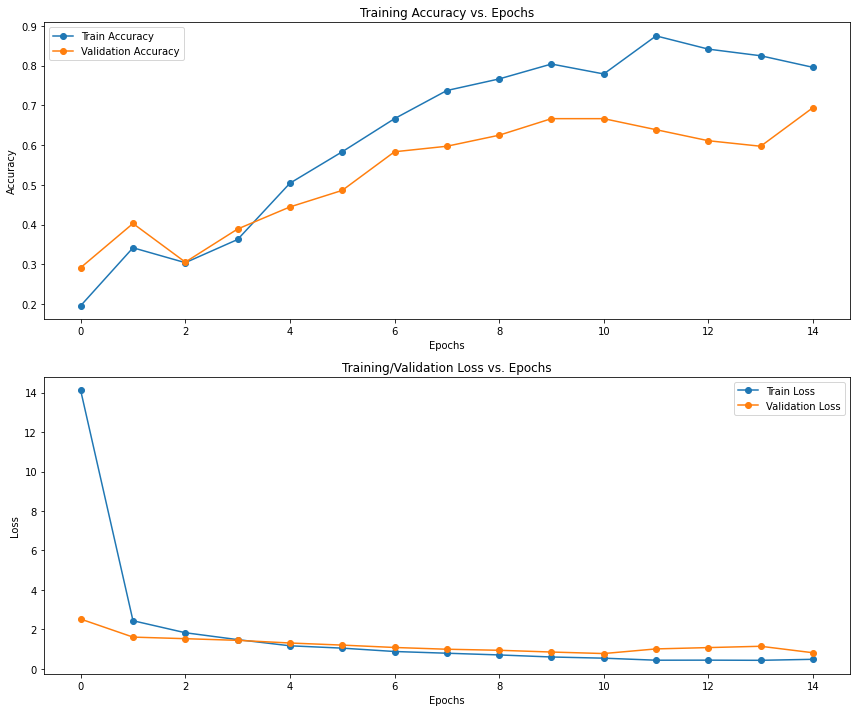

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')



plt.tight_layout()
plt.show()

**3.2.A. Testing the Model on Test Set**

In [14]:
test_dataset = '/content/drive/MyDrive/Artificial Neurons.AI/Dataset/Test'

In [15]:
test_gen = tf.keras.preprocessing.image_dataset_from_directory(
  test_dataset,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 101 files belonging to 4 classes.


In [16]:
test_loss, test_accuracy = cnn_model_a.evaluate(test_gen, batch_size=batch_size)

4/4 [==============================] - 17s 24ms/step - loss: 0.5984 - accuracy: 0.8218


In [17]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy*100}")

Test Loss:     0.5983932018280029
Test Accuracy: 82.17821717262268


In [20]:
predictions = cnn_model_a.predict(test_gen)

In [21]:
class_names = train_gen.class_names
print(class_names)

['ECG', 'Prescription', 'Report', 'X-Ray']


**3.3.A. Test Model  A Predictions On Gradio GUI** 

In [22]:
def predict_image(img):
  img_5d=img.reshape(-1,180,180,3)
  prediction=cnn_model_a.predict(img_5d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(4)}

In [23]:
import gradio as gr

image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://26448.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7ff513acb610>,
 'http://127.0.0.1:7861/',
 'https://26448.gradio.app')

## **CNN Model B**

In [26]:
num_classes = 4

cnn_model_b = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [27]:
cnn_model_b.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [28]:
cnn_model_b.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [29]:
epochs=15
history_cnn_model_b = cnn_model_b.fit(
  train_gen,
  validation_data=val_gen,
  epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 2s 107ms/step - loss: 1.6861 - accuracy: 0.2792 - val_loss: 1.3426 - val_accuracy: 0.2500
Epoch 2/15
8/8 [==============================] - 1s 66ms/step - loss: 1.2618 - accuracy: 0.4042 - val_loss: 1.1346 - val_accuracy: 0.5556
Epoch 3/15
8/8 [==============================] - 1s 64ms/step - loss: 0.9054 - accuracy: 0.6958 - val_loss: 0.8551 - val_accuracy: 0.6389
Epoch 4/15
8/8 [==============================] - 1s 67ms/step - loss: 0.5311 - accuracy: 0.7542 - val_loss: 0.7336 - val_accuracy: 0.7083
Epoch 5/15
8/8 [==============================] - 1s 66ms/step - loss: 0.3974 - accuracy: 0.8292 - val_loss: 0.8258 - val_accuracy: 0.6806
Epoch 6/15
8/8 [==============================] - 1s 62ms/step - loss: 0.4322 - accuracy: 0.8083 - val_loss: 0.5062 - val_accuracy: 0.7917
Epoch 7/15
8/8 [==============================] - 1s 59ms/step - loss: 0.3861 - accuracy: 0.8458 - val_loss: 0.5721 - val_accuracy: 0.7500
Epoch 8/15
8/8 [=====================

**3.1.B. Plotting the Model A Metrics**

In [30]:
train_accuracy = history_cnn_model_b.history['accuracy']
val_accuracy = history_cnn_model_b.history['val_accuracy']

train_loss = history_cnn_model_b.history['loss']
val_loss = history_cnn_model_b.history['val_loss']


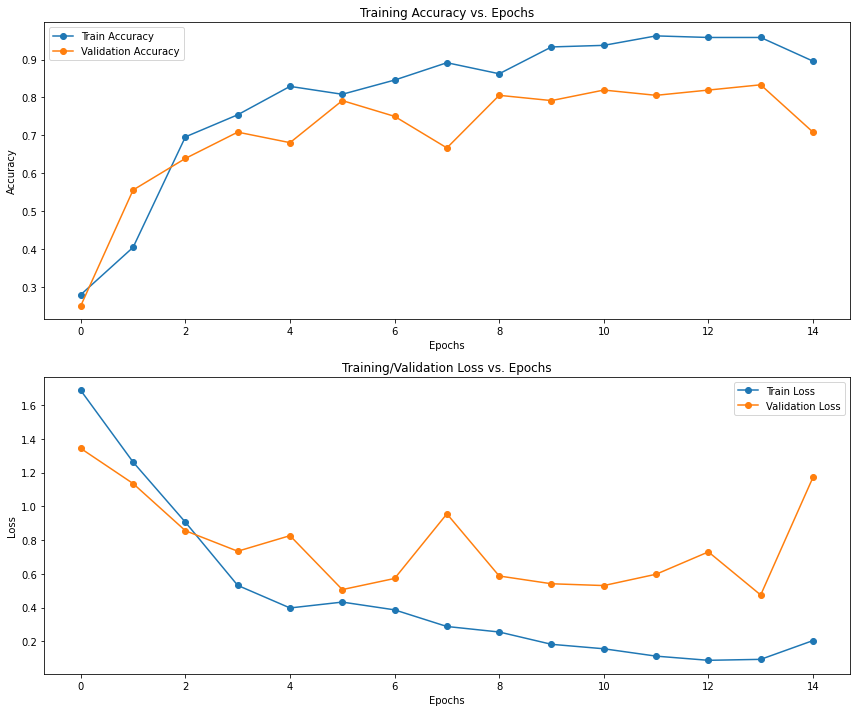

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')



plt.tight_layout()
plt.show()

**3.2.B. Testing the Model on Test Set**

In [32]:
test_loss, test_accuracy = cnn_model_b.evaluate(test_gen, batch_size=batch_size)

4/4 [==============================] - 1s 44ms/step - loss: 1.3552 - accuracy: 0.8515


In [33]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy*100}")

Test Loss:     1.3551987409591675
Test Accuracy: 85.14851331710815


**3.3.B Test Model B Predictions On Gradio GUI** 

In [34]:
def predict_image(img):
  img_5d=img.reshape(-1,180,180,3)
  prediction=cnn_model_b.predict(img_5d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(4)}

In [35]:
import gradio as gr

image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://12461.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7ff5136cd710>,
 'http://127.0.0.1:7860/',
 'https://12461.gradio.app')